In [2]:
import pandas as pd

In [3]:
# Loading training data
train_features = pd.read_csv('training_set_features.csv')
train_labels = pd.read_csv('training_set_labels.csv')
# Loading  test data
test_features = pd.read_csv('test_set_features.csv')
# Loading submission format
submission_format = pd.read_csv('submission_format.csv')

In [4]:
train_features.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [5]:
# Merging features and labels
train_data = pd.merge(train_features, train_labels, on='respondent_id')
train_data.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,xyz_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [6]:
train_data.dtypes

respondent_id                    int64
xyz_concern                    float64
xyz_knowledge                  float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_xyz                float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_xyz_vacc_effective     float64
opinion_xyz_risk               float64
opinion_xyz_sick_from_vacc     float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                      

In [7]:
train_data.isna().sum()

respondent_id                      0
xyz_concern                       92
xyz_knowledge                    116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_xyz                 2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_xyz_vacc_effective       391
opinion_xyz_risk                 388
opinion_xyz_sick_from_vacc       395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [8]:
float64_dtype = list(train_data.dtypes[train_data.dtypes=='float64'].index)
object_dtype = list(train_data.dtypes[train_data.dtypes=='object'].index)

In [9]:
for col in float64_dtype:
    train_data[col].fillna(train_data[col].median(), inplace=True)
    test_features[col].fillna(test_features[col].median(), inplace=True)

C:\Users\Ikshvaku Rastogi\AppData\Local\Temp\ipykernel_114964\259662770.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data[col].fillna(train_data[col].median(), inplace=True)
C:\Users\Ikshvaku Rastogi\AppData\Local\Temp\ipykernel_114964\259662770.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

In [10]:
for col in object_dtype:
    train_data[col].fillna(train_data[col].mode()[0], inplace=True)
    test_features[col].fillna(test_features[col].mode()[0], inplace=True)

C:\Users\Ikshvaku Rastogi\AppData\Local\Temp\ipykernel_114964\2078857.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data[col].fillna(train_data[col].mode()[0], inplace=True)
C:\Users\Ikshvaku Rastogi\AppData\Local\Temp\ipykernel_114964\2078857.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values a

In [11]:
# Encoding Categorical Variables
# One-Hot Encoding
train_data = pd.get_dummies(train_data, columns=object_dtype, drop_first=True)
test_features = pd.get_dummies(test_features, columns=object_dtype, drop_first=True)

In [12]:
test_features.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,employment_occupation_qxajmpny,employment_occupation_rcertsgn,employment_occupation_tfqavkke,employment_occupation_ukymxvdu,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xgwztkwe,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,False,False,False,False,False,False,False,False,False,False
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,True,False,False
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,False,False,False,False,False,False,False,False,False,False
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,False,False,False,False,False,False,False,False,False,False


In [13]:
# # Align the train and test data to ensure they have the same columns
# train_data, test_features = train_data.align(test_features, join='left', axis=1)
# test_features = test_features.fillna(0)

In [14]:
test_features.columns

Index(['respondent_id', 'xyz_concern', 'xyz_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_xyz', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_xyz_vacc_effective', 'opinion_xyz_risk',
       'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults',
       'household_children', 'age_group_35 - 44 Years',
       'age_group_45 - 54 Years', 'age_group_55 - 64 Years',
       'age_group_65+ Years', 'education_< 12 Years',
       'education_College Graduate', 'education_Some College', 'race_Hispanic',
       'race_Other or Multiple', 'race_White', 'sex_Male',
       'income_poverty_> $75,000', 'income_poverty_Below Poverty',
       'marita

In [15]:
# Standardizing
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Separating features and target variables for training
X_train = scaler.fit_transform(train_data.drop(columns=['respondent_id', 'xyz_vaccine', 'seasonal_vaccine']))
X_test = scaler.transform(test_features.drop(columns=['respondent_id']))
y_train = train_data[['xyz_vaccine', 'seasonal_vaccine']]


In [16]:
# Training

In [17]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [18]:
logreg_model = MultiOutputClassifier(LogisticRegression(random_state=42))
logreg_model.fit(X_train, y_train)

MultiOutputClassifier(estimator=LogisticRegression(random_state=42))

In [19]:
rf_model = MultiOutputClassifier(RandomForestClassifier(n_estimators=100, random_state=42))
rf_model.fit(X_train, y_train)

MultiOutputClassifier(estimator=RandomForestClassifier(random_state=42))

In [20]:
nb_model = MultiOutputClassifier(GaussianNB())
nb_model.fit(X_train, y_train)

MultiOutputClassifier(estimator=GaussianNB())

In [21]:
#   Model Evaluation

In [23]:
#plotting

In [35]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.model_selection import cross_val_score

In [30]:
models = {
    "Naive Bayes":nb_model,
    "Random Forest":rf_model,
    "Logistic Regression":logreg_model
}

In [36]:

logreg_scores = cross_val_score(logreg_model, X_train, y_train, cv=5, scoring='roc_auc')
print(f'Logistic Regression Mean ROC AUC: {logreg_scores.mean()}')

nb_scores = cross_val_score(nb_model, X_train, y_train, cv=5, scoring='roc_auc')
print(f'Naive Bayes Mean ROC AUC: {nb_scores.mean()}')

rf_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='roc_auc')
print(f'Random Forest Mean ROC AUC: {rf_scores.mean()}')

Logistic Regression Mean ROC AUC: 0.8435117744563257
Naive Bayes Mean ROC AUC: 0.7245076450160204
Random Forest Mean ROC AUC: 0.8379467352632446


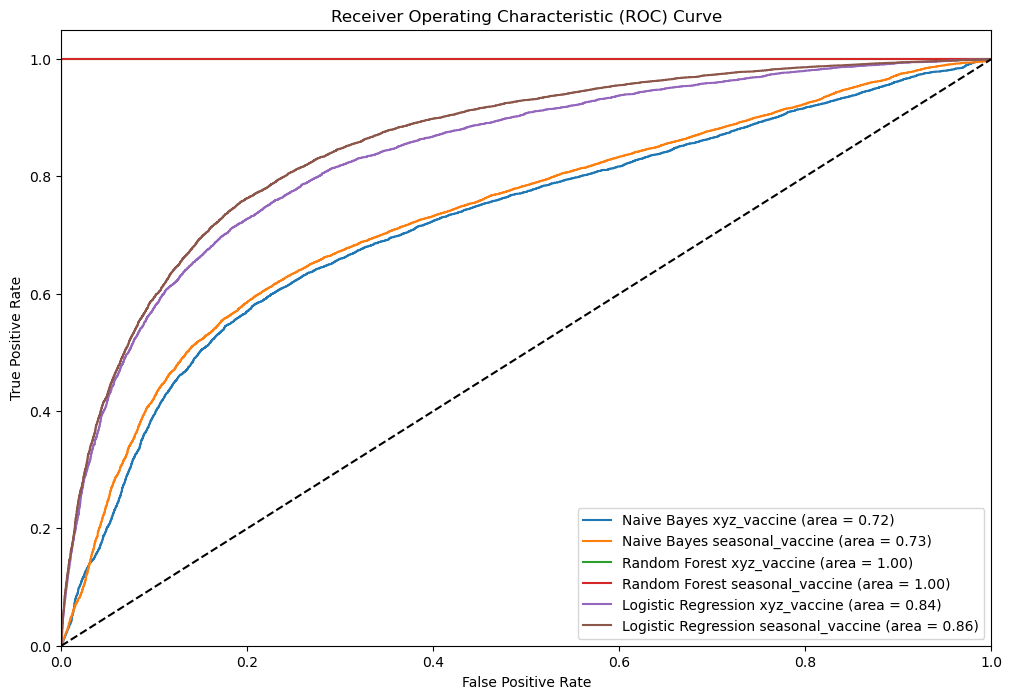

In [38]:
# Plot ROC AUC curves
plt.figure(figsize=(12, 8))
for name, model in models.items():
    y_pred_proba = model.predict_proba(X_train)
    fpr = {}
    tpr = {}
    roc_auc = {}
    for i, label in enumerate(['xyz_vaccine', 'seasonal_vaccine']):
        fpr[label], tpr[label], _ = roc_curve(y_train[label], y_pred_proba[i][:, 1])
        roc_auc[label] = auc(fpr[label], tpr[label])
        plt.plot(fpr[label], tpr[label], label=f'{name} {label} (area = {roc_auc[label]:.2f})')
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [40]:
# Determine the best model
best_model_name = 'Logistic Regression'
best_model_score = logreg_scores.mean()
print(f'Best Model: {best_model_name} with ROC AUC score: {best_model_score}')

Best Model: Logistic Regression with ROC AUC score: 0.8435117744563257


In [41]:
# Final Model and Submission
final_predictions = logreg_model.predict_proba(X_test)
final_predictions_df = pd.DataFrame({
    'respondent_id': test_features['respondent_id'],
    'xyz_vaccine': final_predictions[0][:, 1],
    'seasonal_vaccine': final_predictions[1][:, 1]
})

final_predictions_df.to_csv('submission.csv', index=False)